## DSA Assignment
#### 211090073 Astik Sonawane

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import power_transform
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [ ]:
'''Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.'''

In [3]:
df = pd.read_excel(r'C:\Users\HOME\Desktop\DSA\Assignment 3\EastWestAirlines.xlsx', sheet_name='data')
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [5]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [6]:
df1 =df.drop('ID#',axis=1)

In [7]:
#checking for null values
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [8]:
# checking for duplicates
df1[df.duplicated(keep=False)]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?


### Outliers detection

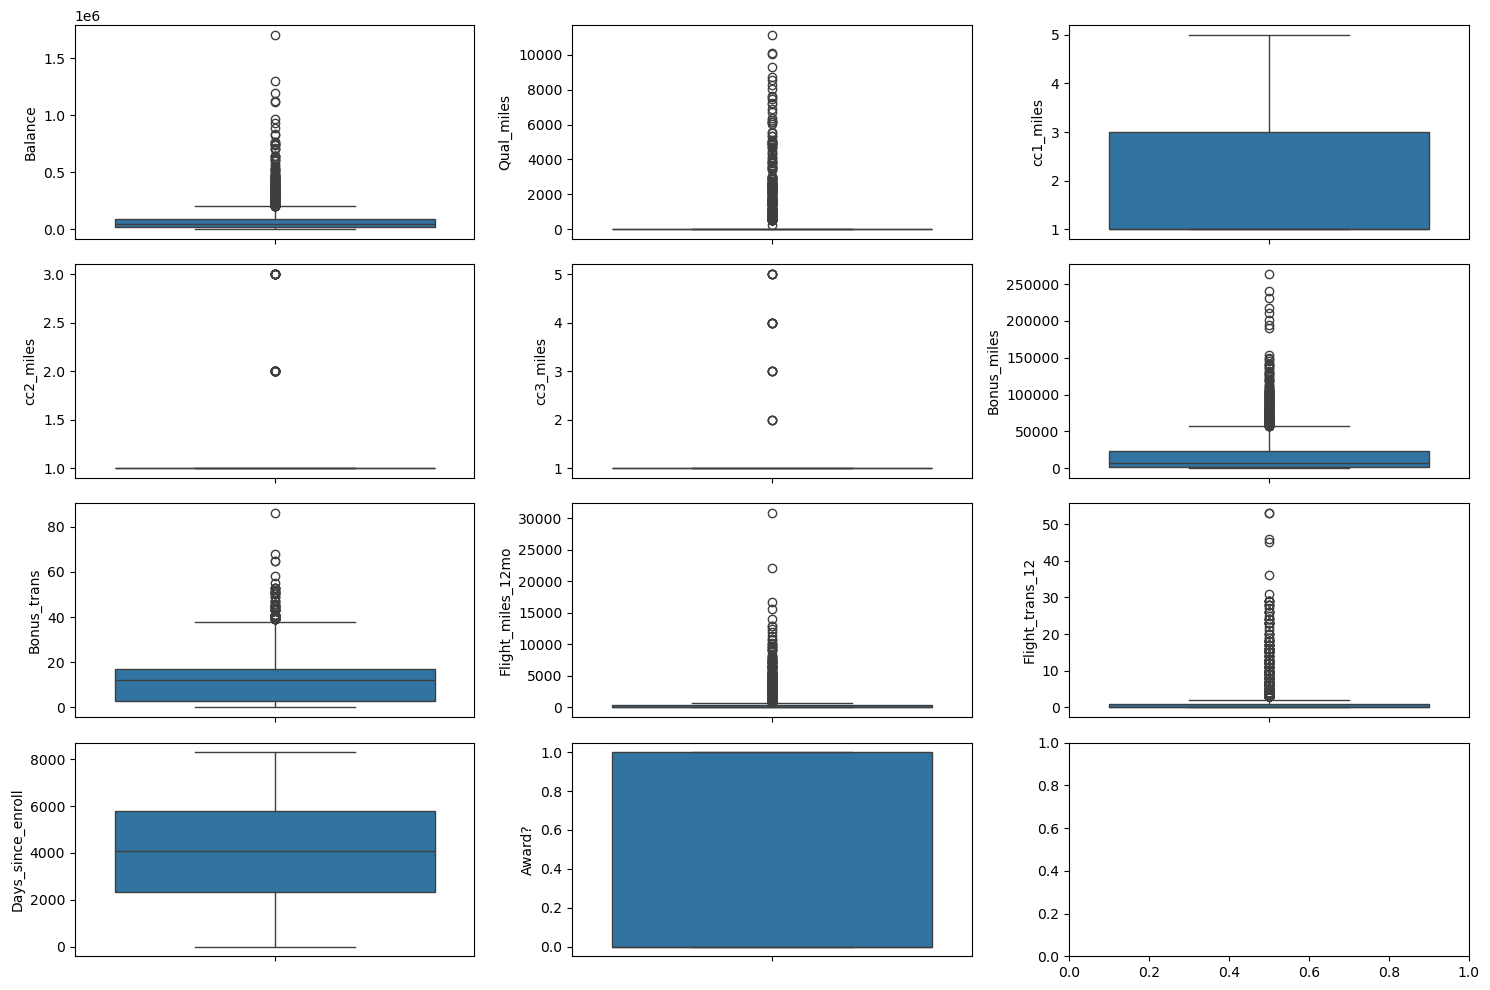

In [9]:
# using box plot
fig, ax = plt.subplots(4,3,figsize=(15,10))
sns.boxplot(df1.Balance,ax=ax[0,0])
sns.boxplot(df1.Qual_miles,ax=ax[0,1])
sns.boxplot(df1.cc1_miles,ax=ax[0,2])
sns.boxplot(df1.cc2_miles,ax=ax[1,0])
sns.boxplot(df1.cc3_miles,ax=ax[1,1])
sns.boxplot(df1.Bonus_miles,ax=ax[1,2])
sns.boxplot(df1.Bonus_trans,ax=ax[2,0])
sns.boxplot(df1.Flight_miles_12mo,ax=ax[2,1])
sns.boxplot(df1.Flight_trans_12,ax=ax[2,2])
sns.boxplot(df1.Days_since_enroll,ax=ax[3,0])
sns.boxplot(df1['Award?'],ax=ax[3,1])

plt.tight_layout()
plt.show()

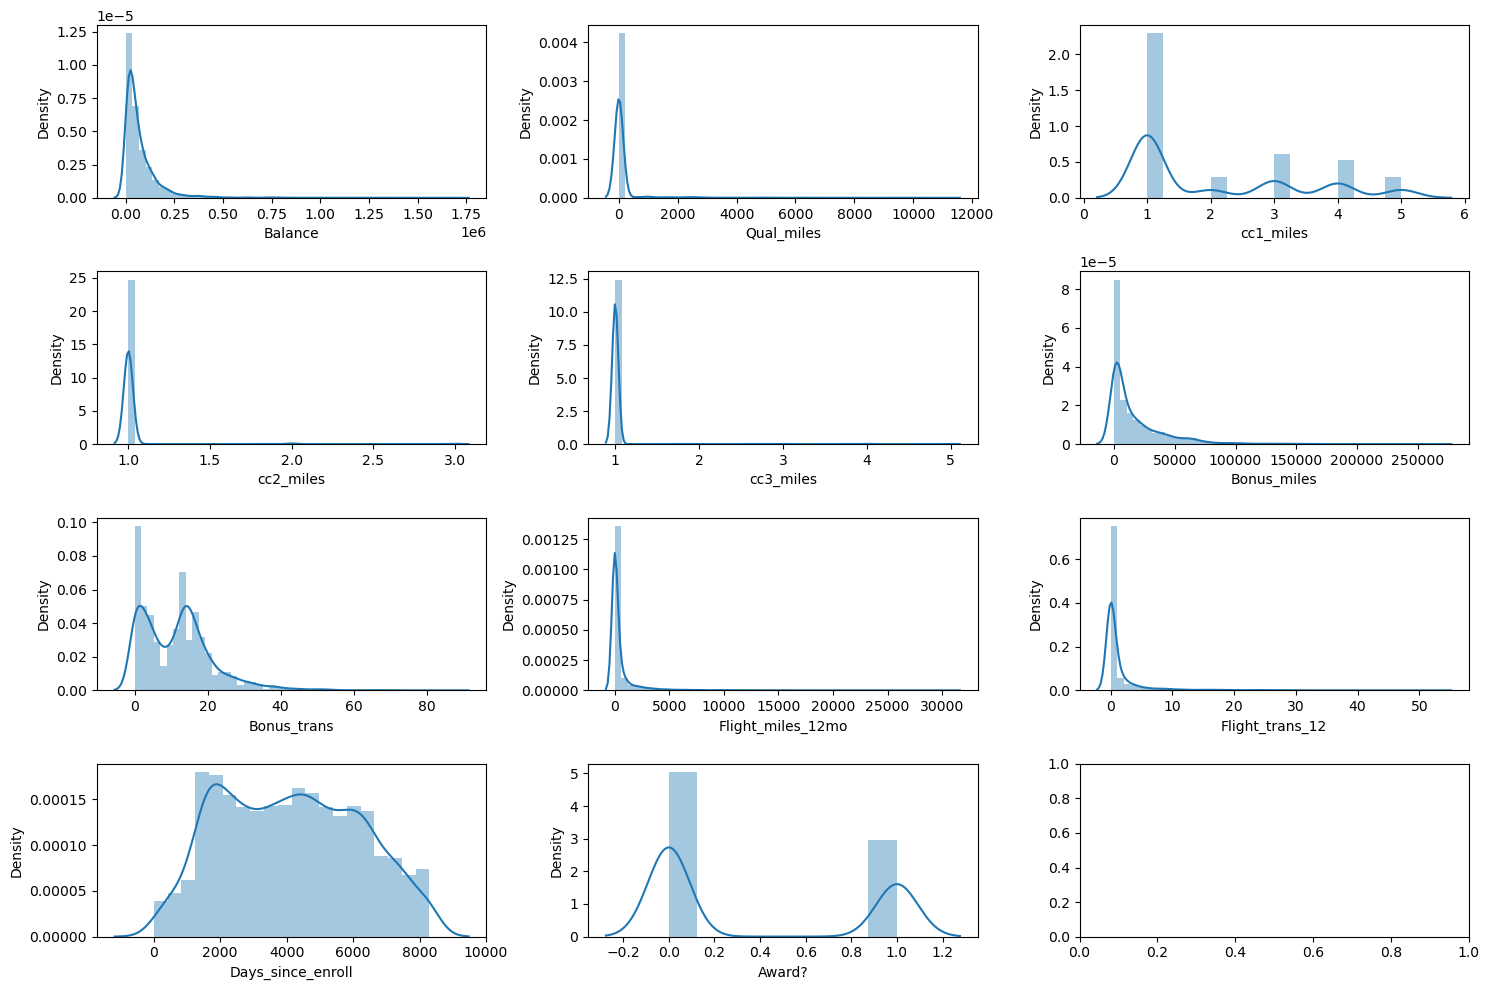

In [10]:
#using distplot
fig, ax = plt.subplots(4,3,figsize=(15,10))
sns.distplot(df1.Balance,ax=ax[0,0])
sns.distplot(df1.Qual_miles,ax=ax[0,1])
sns.distplot(df1.cc1_miles,ax=ax[0,2])
sns.distplot(df1.cc2_miles,ax=ax[1,0])
sns.distplot(df1.cc3_miles,ax=ax[1,1])
sns.distplot(df1.Bonus_miles,ax=ax[1,2])
sns.distplot(df1.Bonus_trans,ax=ax[2,0])
sns.distplot(df1.Flight_miles_12mo,ax=ax[2,1])
sns.distplot(df1.Flight_trans_12,ax=ax[2,2])
sns.distplot(df1.Days_since_enroll,ax=ax[3,0])
sns.distplot(df1['Award?'],ax=ax[3,1])

plt.tight_layout()
plt.show()

#### Using power transform for standardizing distribution

In [11]:
df2 = df1[['Balance','Qual_miles','cc1_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll','Award?']]
df2_transformed = power_transform(df2,method='yeo-johnson')

In [12]:
df2 =pd.DataFrame(df2_transformed,columns=['Balance','Qual_miles','cc1_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll','Award?'])
df2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.346816,-0.244743,-0.844766,0.0,0.0,-1.178402,-1.329671,-0.683308,-0.674970,1.321776,-0.766919
1,-0.633084,-0.244743,-0.844766,0.0,0.0,-1.132416,-1.074960,-0.683308,-0.674970,1.308873,-0.766919
2,-0.038549,-0.244743,-0.844766,0.0,0.0,-0.191941,-0.688822,-0.683308,-0.674970,1.335468,-0.766919
3,-0.821989,-0.244743,-0.844766,0.0,0.0,-0.924946,-1.329671,-0.683308,-0.674970,1.302415,-0.766919
4,0.723596,-0.244743,1.343165,0.0,0.0,1.169363,1.329711,1.549026,1.685925,1.295549,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.662730,-0.244743,-0.844766,0.0,0.0,0.153811,-0.688822,1.346970,1.081077,-1.364712,1.303918
3995,0.340486,-0.244743,-0.844766,0.0,0.0,-0.727886,-0.530613,-0.683308,-0.674970,-1.369774,1.303918
3996,0.460388,-0.244743,1.058591,0.0,0.0,0.795077,-0.134235,-0.683308,-0.674970,-1.365345,1.303918
3997,0.200904,-0.244743,-0.844766,0.0,0.0,-0.924946,-1.329671,1.446453,1.081077,-1.365977,-0.766919


### visualization after transformation

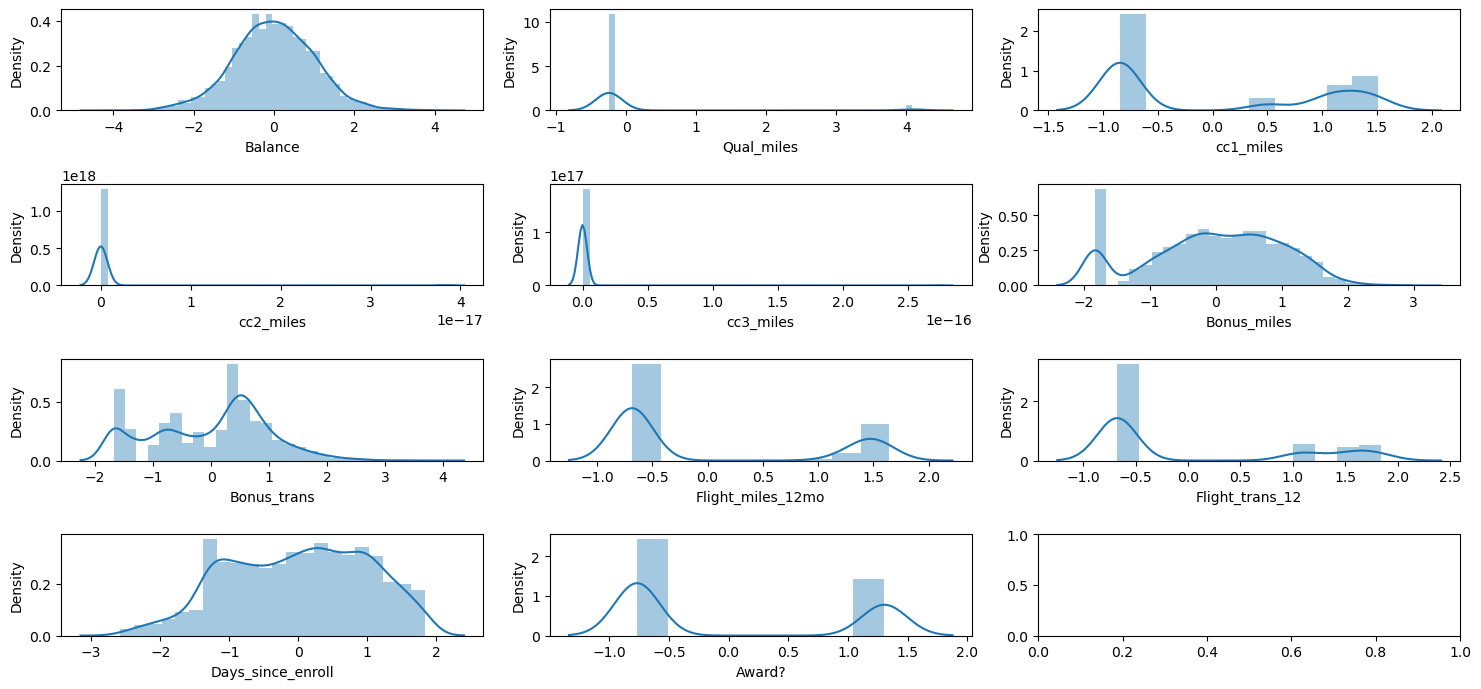

In [13]:
#using distplot
fig, ax = plt.subplots(4,3,figsize=(15,7))
sns.distplot(df2.Balance,ax=ax[0,0])
sns.distplot(df2.Qual_miles,ax=ax[0,1])
sns.distplot(df2.cc1_miles,ax=ax[0,2])
sns.distplot(df2.cc2_miles,ax=ax[1,0])
sns.distplot(df2.cc3_miles,ax=ax[1,1])
sns.distplot(df2.Bonus_miles,ax=ax[1,2])
sns.distplot(df2.Bonus_trans,ax=ax[2,0])
sns.distplot(df2.Flight_miles_12mo,ax=ax[2,1])
sns.distplot(df2.Flight_trans_12,ax=ax[2,2])
sns.distplot(df2.Days_since_enroll,ax=ax[3,0])
sns.distplot(df2['Award?'],ax=ax[3,1])

plt.tight_layout()
plt.show()

## Cluster formation

### using average linkage method

Text(0.5, 1.0, 'Dendrogram')

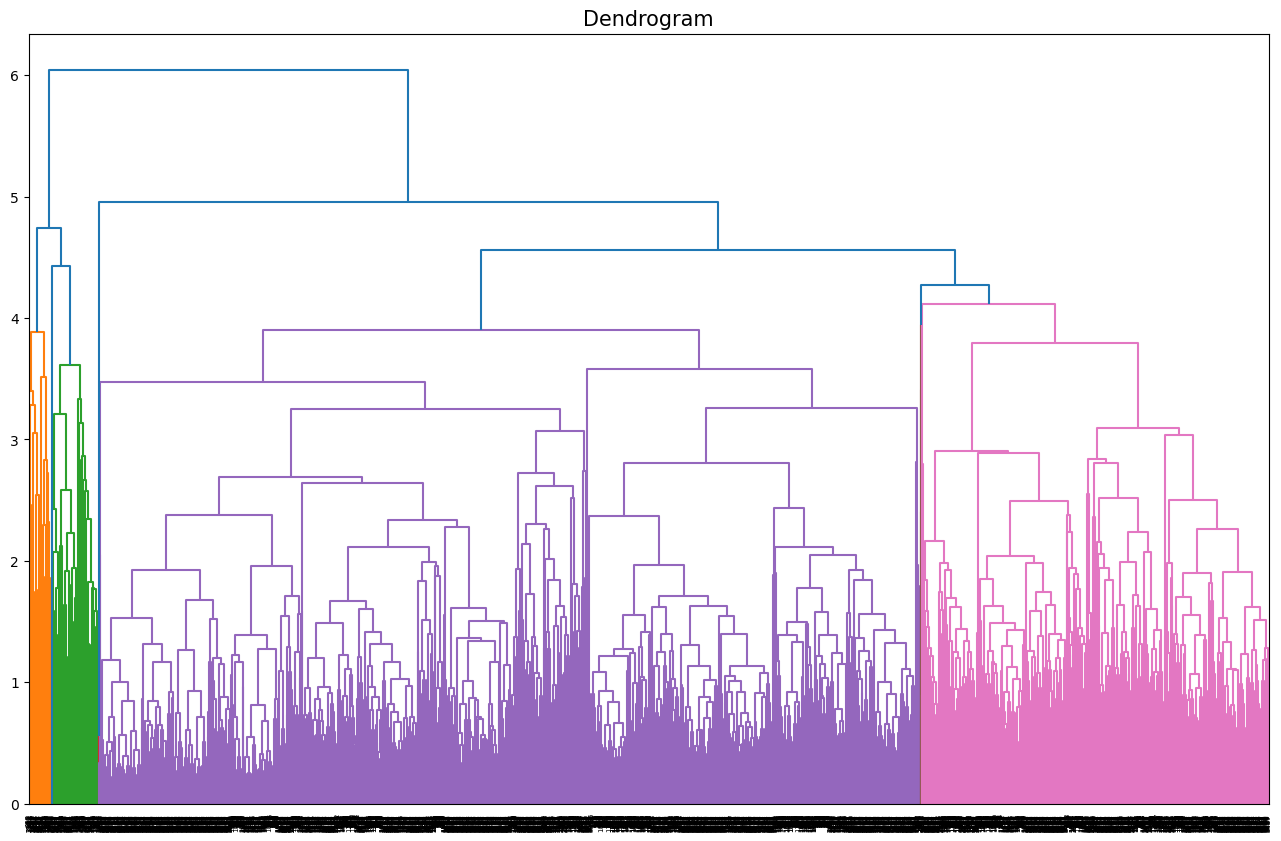

In [14]:
fig = plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(df2_transformed,method='average'))
plt.title('Dendrogram',size=15)


# Agglomerative hierarchical clustering

In [15]:
hc = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='average')

In [16]:
# Fitting data on model
hc_fit = hc.fit_predict(df2_transformed)
Clusters = pd.DataFrame(hc_fit,columns=['Clusters'])

In [17]:
df['cluster']=hc_fit
df.groupby('cluster').agg(['mean']).reset_index()

,cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1799.350993,170339.198675,2508.019868,2.278146,1.013245,1.013245,28717.337748,18.344371,2574.390728,7.768212,4478.728477,0.768212
1,1,1891.090828,104075.087266,0.000000,2.290294,1.017809,1.016919,23897.578807,15.159394,1291.878896,3.845058,4368.430098,0.547640
2,2,1425.000000,125.000000,0.000000,1.000000,1.000000,1.000000,125.000000,1.000000,125.000000,1.000000,5163.500000,0.000000
3,3,2028.933333,57973.546667,2634.706667,2.000000,1.000000,1.000000,15002.626667,10.026667,0.000000,0.000000,4111.026667,0.400000
4,4,2079.624622,55659.328172,0.000000,1.951662,1.013595,1.010574,13694.672961,9.761329,0.000000,0.000000,3991.476586,0.271903


In [18]:
for i in range(5):
    print('cluster',i)
    print('Total Members in hierarchy:',len(list(df[df['cluster']==i]['ID#'].values)))
    print()

cluster 0
Total Members in hierarchy: 151

cluster 1
Total Members in hierarchy: 1123

cluster 2
Total Members in hierarchy: 2

cluster 3
Total Members in hierarchy: 75

cluster 4
Total Members in hierarchy: 2648



#### Using Centroid Linkeage method

Text(0.5, 1.0, 'Dendrogram')

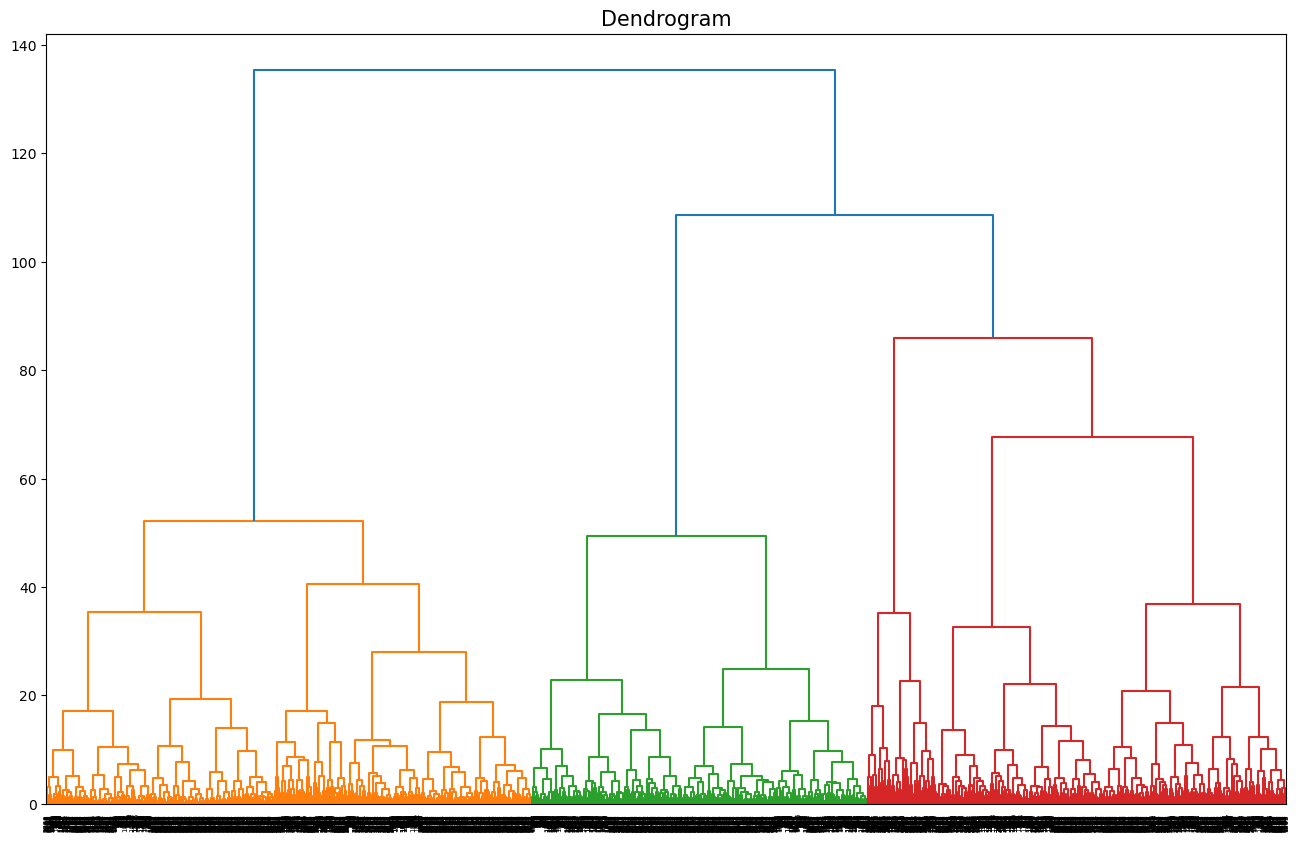

In [19]:
fig = plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(df2_transformed,method='ward'))
plt.title('Dendrogram',size=15)

In [20]:
#cluster formation
hc1 = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')

In [21]:
# fitting data on model
hc1_fit = hc1.fit_predict(df2_transformed)
Clusters1 = pd.DataFrame(hc1_fit,columns=['Clusters'])

In [22]:
df['cluster']=hc1_fit

In [23]:
df.groupby('cluster').agg(['mean']).reset_index()

,cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2270.985322,33419.559030,0.000000,1.000000,1.022336,1.005105,2837.693044,5.463944,0.000000,0.000000,3631.267390,0.151883
1,1,2113.270270,77788.952703,0.000000,1.000000,1.030405,1.000000,6038.932432,8.885135,1403.608108,4.155405,3981.564189,0.429054
2,2,1802.231267,87897.735430,0.000000,3.331175,1.000925,1.018501,29432.774283,15.990749,0.000000,0.000000,4513.629972,0.445883
3,3,1875.539823,133049.712389,2550.061947,2.185841,1.008850,1.008850,24165.995575,15.584071,1720.057522,5.190265,4356.703540,0.646018
4,4,1642.568480,132880.887430,0.000000,3.718574,1.003752,1.035647,43643.870544,22.075047,1163.403377,3.489681,4801.103189,0.677298


In [24]:
for i in range(5):
    print('cluster',i)
    print('Total Members in hierarchy:',len(list(df[df['cluster']==i]['ID#'].values)))
    print()

cluster 0
Total Members in hierarchy: 1567

cluster 1
Total Members in hierarchy: 592

cluster 2
Total Members in hierarchy: 1081

cluster 3
Total Members in hierarchy: 226

cluster 4
Total Members in hierarchy: 533



### using complete linkage method

Text(0.5, 1.0, 'Dendrogram')

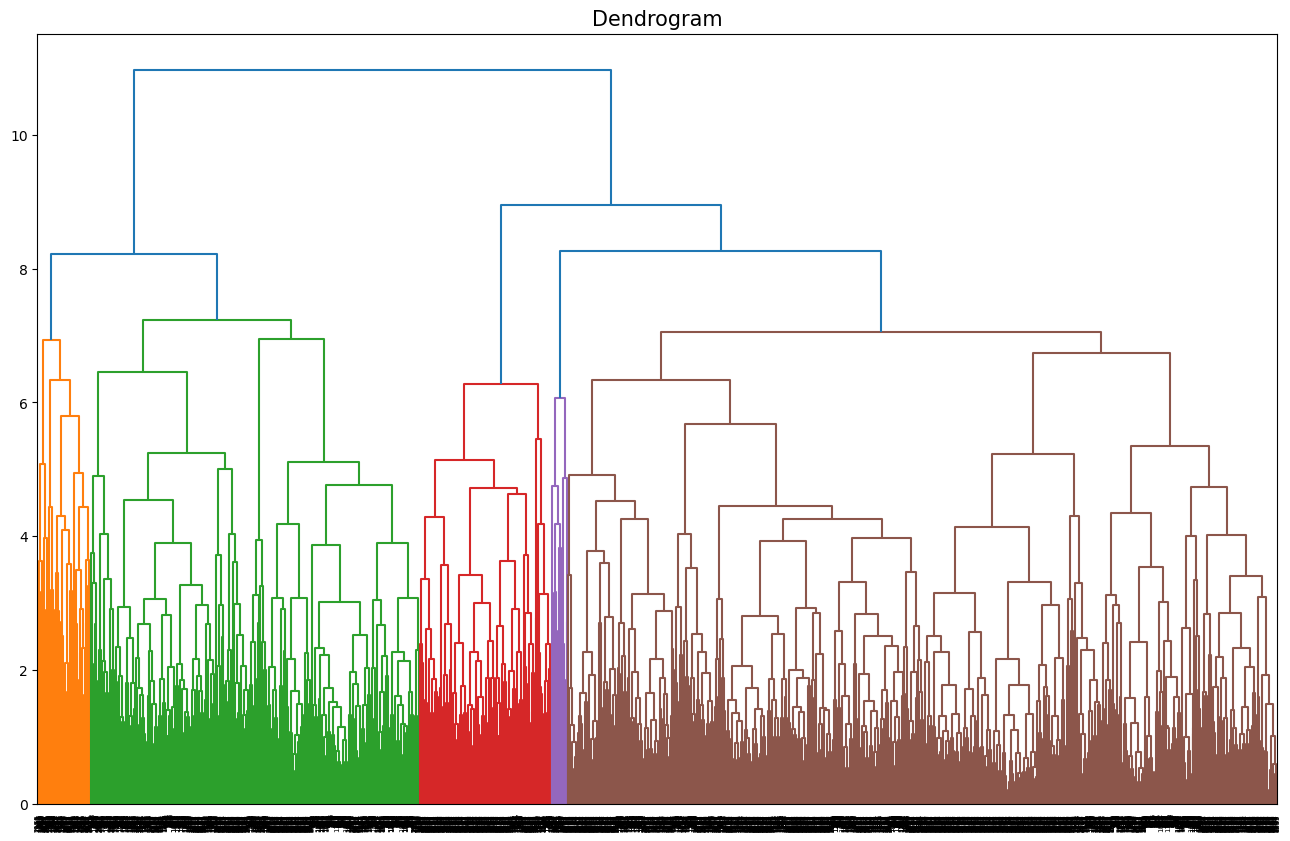

In [25]:
fig = plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(df2_transformed,method='complete'))
plt.title('Dendrogram',size=15)

In [26]:
#cluster formation
hc2 = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')

In [27]:
# fitting data on model
hc2_fit = hc2.fit_predict(df2_transformed)
Clusters2 = pd.DataFrame(hc2_fit,columns=['Clusters'])

In [28]:
df['cluster']=hc2_fit
df.groupby('cluster').agg(['mean']).reset_index()

,cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1475.911404,145838.029218,0.000000,3.541942,1.004713,1.032045,39928.083883,19.713478,809.139491,2.377003,5095.663525,0.553252
1,1,2168.733392,39231.260927,0.000000,1.506119,1.016608,1.005682,7506.878497,7.910839,53.164773,0.161713,3831.724213,0.220717
2,2,2607.044811,46620.754717,0.000000,1.268868,1.030660,1.000000,8399.268868,9.099057,1110.594340,3.367925,3094.386792,0.573113
3,3,2367.264151,46202.320755,2805.528302,1.000000,1.000000,1.000000,2909.528302,3.962264,188.245283,0.566038,3446.471698,0.264151
4,4,1724.895954,159656.138728,2471.797688,2.549133,1.011561,1.011561,30678.092486,19.144509,2189.341040,6.606936,4635.560694,0.763006


In [29]:
for i in range(5):
    print('cluster',i)
    print('Total Members in hierarchy:',len(list(df[df['cluster']==i]['ID#'].values)))
    print()

cluster 0
Total Members in hierarchy: 1061

cluster 1
Total Members in hierarchy: 2288

cluster 2
Total Members in hierarchy: 424

cluster 3
Total Members in hierarchy: 53

cluster 4
Total Members in hierarchy: 173



## Elbow plot

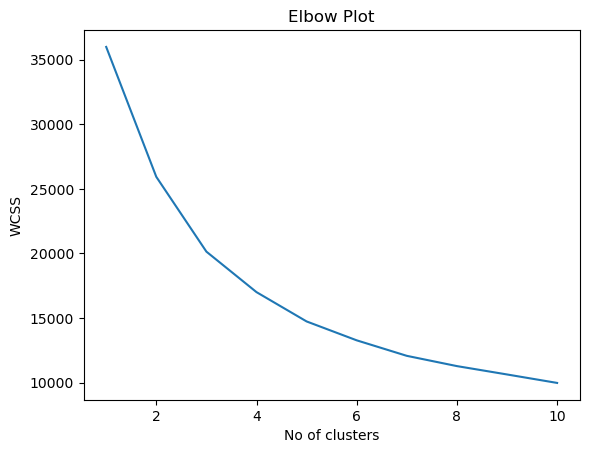

In [35]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df2_transformed)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Elbow Plot')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

### Creating 5 group cluster with k means

In [36]:
from sklearn.cluster import KMeans

# Create KMeans object with 5 clusters and random_state=42
new_clusters = KMeans(n_clusters=5, random_state=42)

# Fit KMeans to the transformed DataFrame
new_clusters.fit(df2_transformed)


KMeans(n_clusters=5, random_state=42)

In [37]:
# Get the cluster labels assigned by KMeans
KM_labels = new_clusters.labels_

# Assign cluster labels to a new column in the DataFrame
df['cluster'] = new_clusters.labels_

# Get the cluster centers
new_clusters.cluster_centers_


array([[ 5.95617244e-01,  4.08591363e+00,  6.27073775e-02,
         1.71909534e-19,  1.23462301e-18,  3.71406537e-01,
         4.00741007e-01,  7.95774742e-01,  8.51260285e-01,
         1.51964211e-01,  5.94982813e-01],
       [-6.76230385e-01, -2.32975213e-01, -8.35577978e-01,
         4.66678326e-19,  5.77778983e-34, -9.10280190e-01,
        -8.20207305e-01, -6.82082524e-01, -6.73777367e-01,
        -3.12181555e-01, -5.16505530e-01],
       [ 7.54505594e-01, -2.44743303e-01,  1.11374957e+00,
         2.77052025e-19,  2.98460591e-18,  1.03665259e+00,
         1.04603128e+00,  1.45646102e+00,  1.41053352e+00,
         3.58290326e-01,  6.72519442e-01],
       [ 3.71108591e-01, -2.44743303e-01,  9.07534146e-01,
         2.90834249e-19,  2.55287841e-18,  7.16521541e-01,
         5.91044806e-01, -6.83308041e-01, -6.74970335e-01,
         2.39594007e-01,  1.83456571e-01],
       [ 1.60074522e-02, -2.44743303e-01, -8.19239258e-01,
         7.32640630e-19, -3.85185989e-34, -2.79105284e-01,
  

In [38]:
for i in range(5):
    print('cluster',i)
    print('Total Members in hierarchy:',len(list(df[df['cluster']==i]['ID#'].values)))
    print()

cluster 0
Total Members in hierarchy: 222

cluster 1
Total Members in hierarchy: 1474

cluster 2
Total Members in hierarchy: 551

cluster 3
Total Members in hierarchy: 1179

cluster 4
Total Members in hierarchy: 573



### -------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
'''Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.
Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States'''

In [65]:
data = pd.read_csv(r'C:\Users\HOME\Desktop\DSA\Assignment 3\crime_data.csv')
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [66]:
#renaming column
data.rename(columns={'Unnamed: 0': 'Country'}, inplace=True)

In [67]:
#checking for null values
data.sum().isnull()

Country     False
Murder      False
Assault     False
UrbanPop    False
Rape        False
dtype: bool

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [69]:
#removing duplicated rows
data = data[~data.duplicated(keep=False)]

### Outliers detection

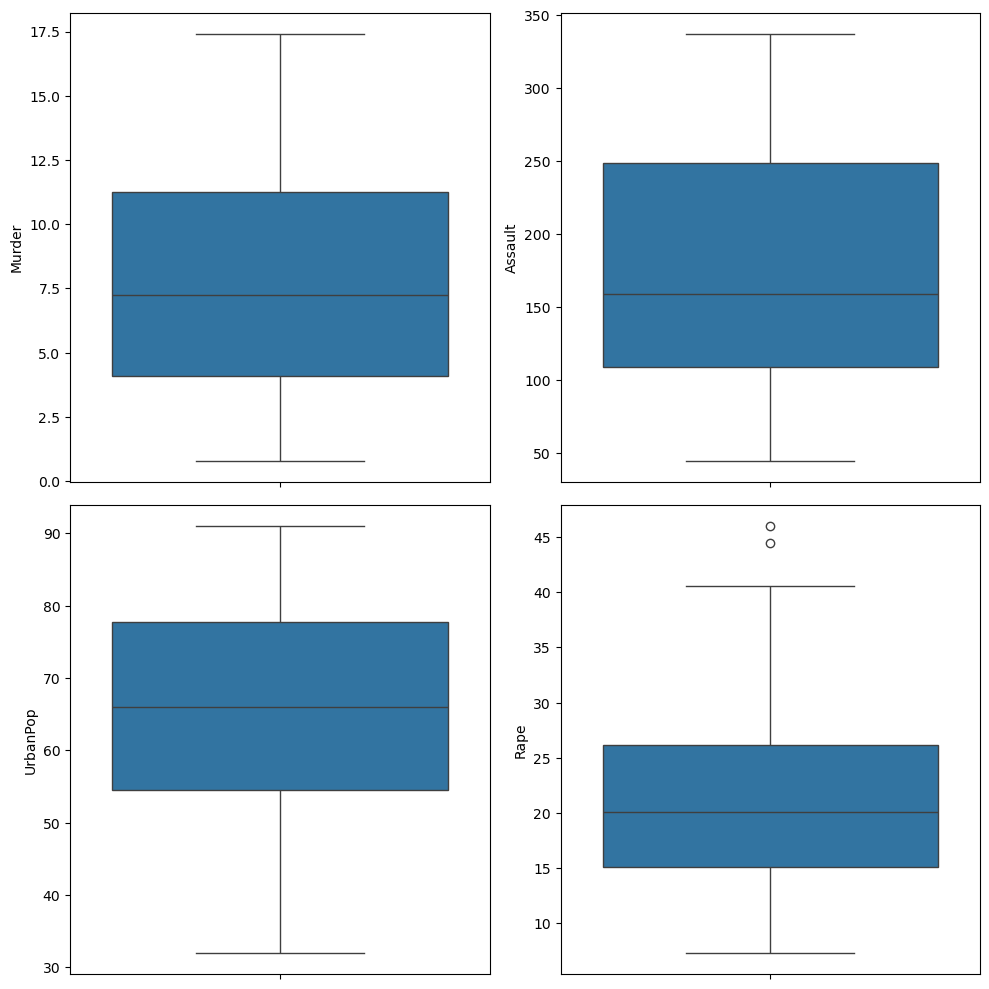

In [70]:
# using box plot
fig, ax = plt.subplots(2,2,figsize=(10,10))
sns.boxplot(data.Murder,ax=ax[0,0])
sns.boxplot(data.Assault,ax=ax[0,1])
sns.boxplot(data.UrbanPop,ax=ax[1,0])
sns.boxplot(data.Rape,ax=ax[1,1])

plt.tight_layout()
plt.show()


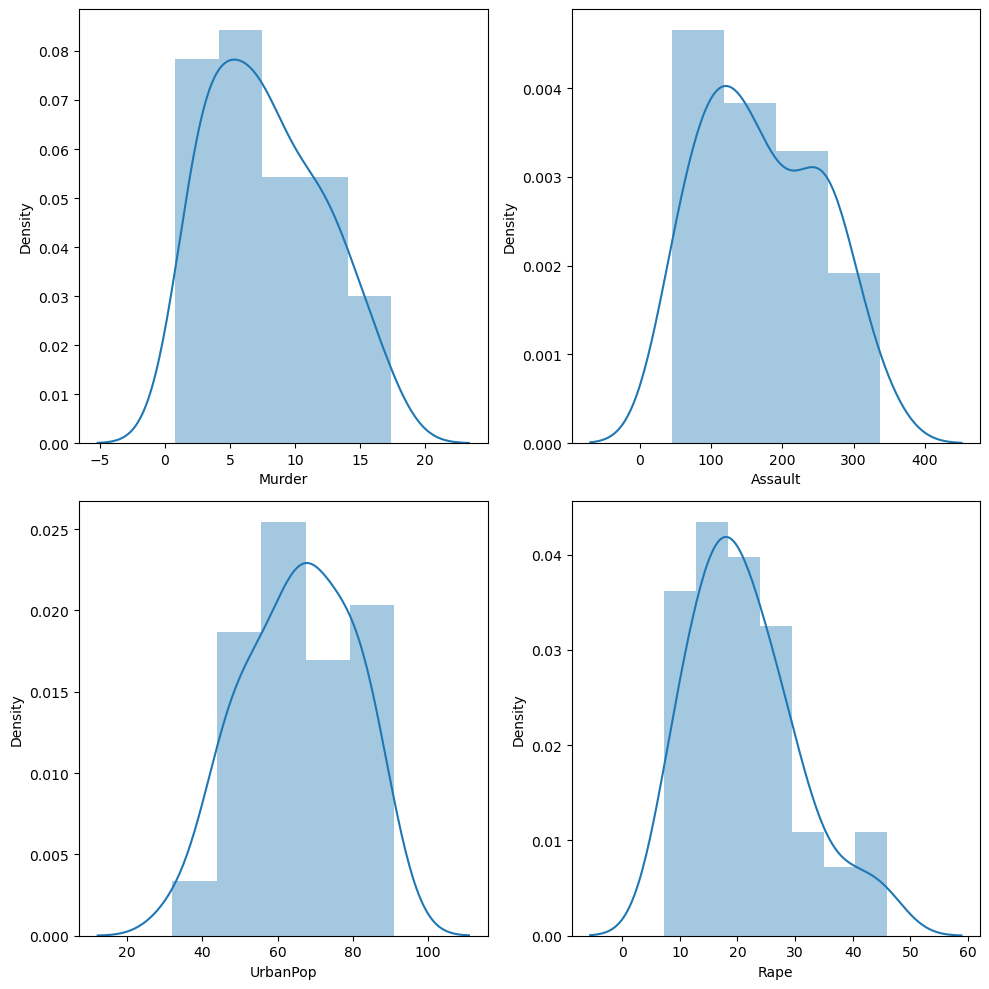

In [71]:
# using dist plot
fig, ax = plt.subplots(2,2,figsize=(10,10))
sns.distplot(data.Murder,ax=ax[0,0])
sns.distplot(data.Assault,ax=ax[0,1])
sns.distplot(data.UrbanPop,ax=ax[1,0])
sns.distplot(data.Rape,ax=ax[1,1])

plt.tight_layout()
plt.show()

#### Using power transform to standardize distribution

In [75]:
data1 = data[['Murder','Assault','UrbanPop','Rape']]
data1_transformed = power_transform(data1,method='yeo-johnson')


In [76]:
data1 = pd.DataFrame(data1_transformed,columns=['Murder','Assault','UrbanPop','Rape'])
data1.head()

,Murder,Assault,UrbanPop,Rape
0,1.193980,0.823923,-0.558080,0.171772
1,0.612467,1.088030,-1.217271,1.991841
2,0.218738,1.376029,1.018593,1.074267
3,0.368945,0.338847,-1.088646,-0.018283
4,0.410700,1.210644,1.863606,1.753540


### Visualization after transformation

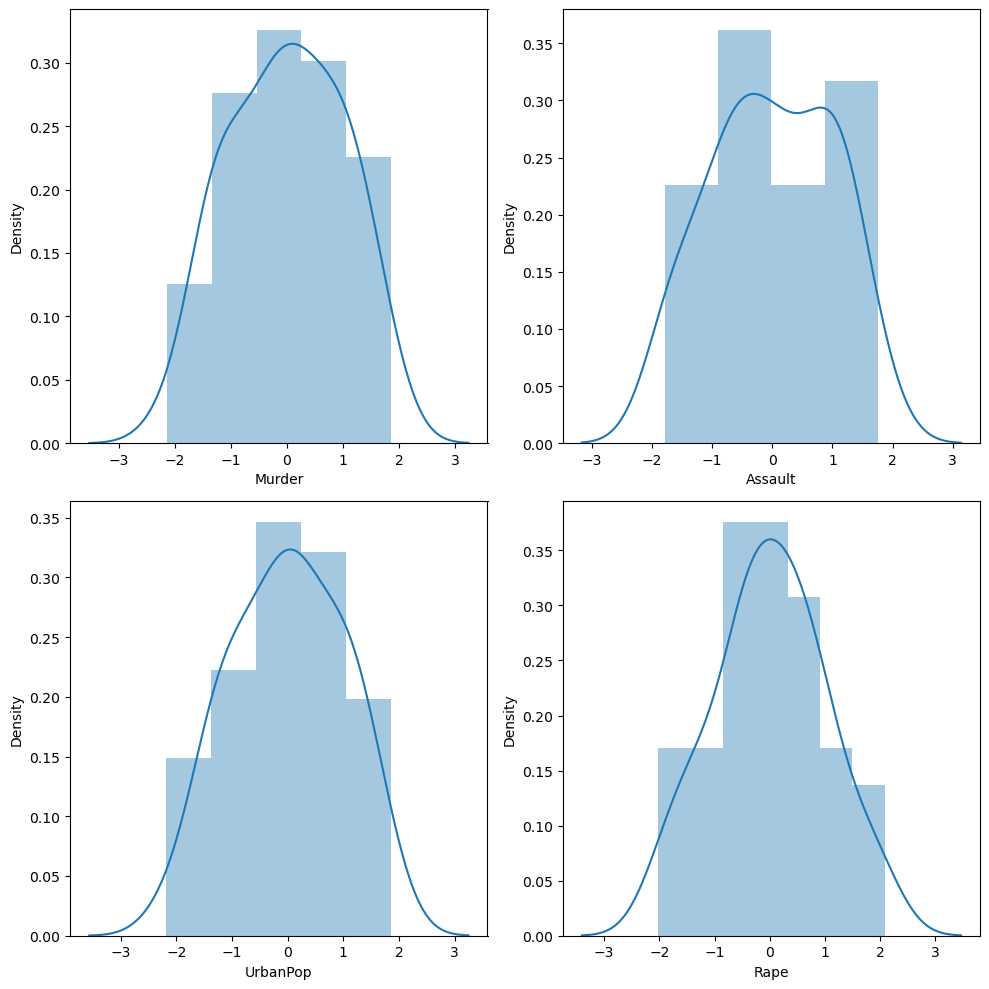

In [77]:
# using dist plot
fig, ax = plt.subplots(2,2,figsize=(10,10))
sns.distplot(data1.Murder,ax=ax[0,0])
sns.distplot(data1.Assault,ax=ax[0,1])
sns.distplot(data1.UrbanPop,ax=ax[1,0])
sns.distplot(data1.Rape,ax=ax[1,1])

plt.tight_layout()
plt.show()

## Cluster formation

### average linkage method

Text(0.5, 1.0, 'Dendrogram')

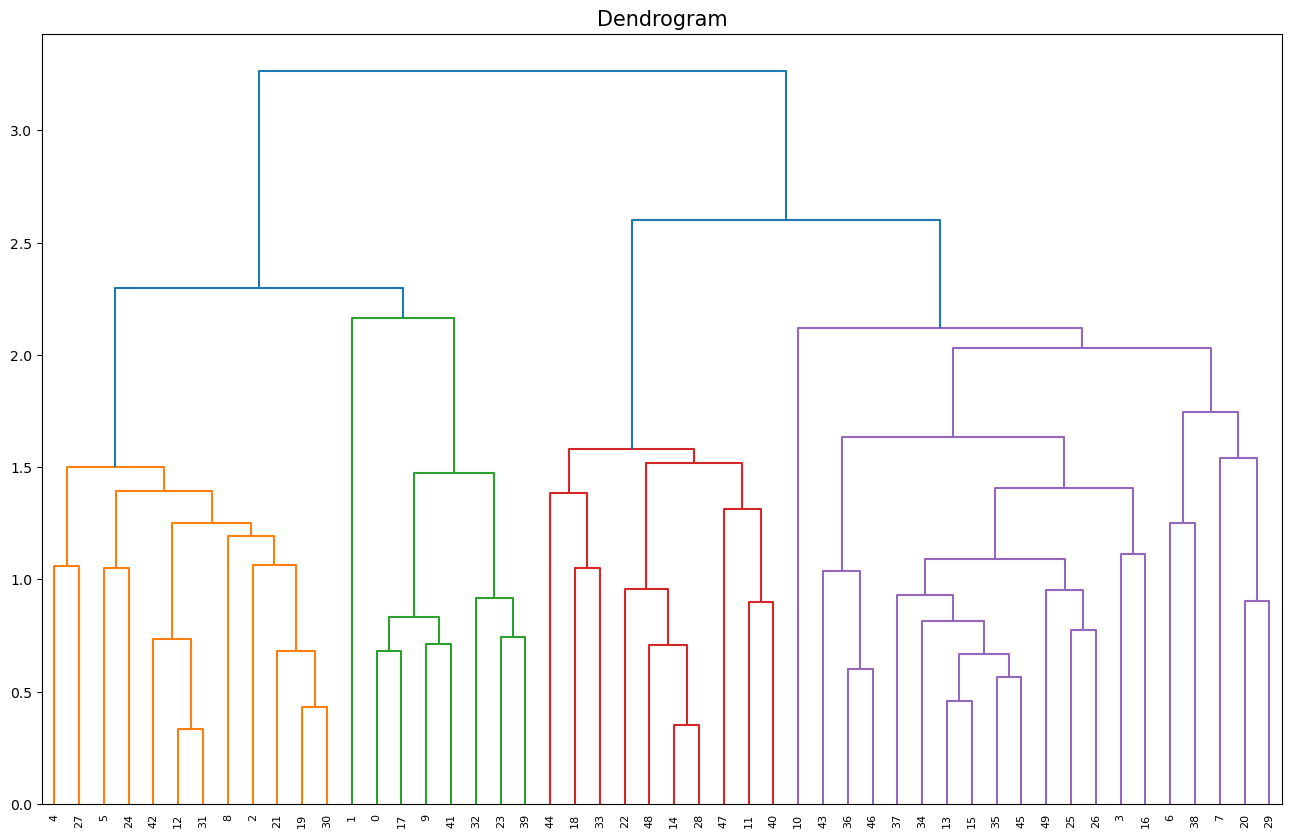

In [83]:
fig = plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(data1_transformed,method='average'))
plt.title('Dendrogram',size=15)


### Agglomerative hierarchical clustering

In [85]:
dc = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='average')

In [90]:
# Fitting data on model
dc_fit = dc.fit_predict(data1_transformed)
Clusters = pd.DataFrame(dc_fit,columns=['Clusters'])

In [98]:
data['cluster'] = dc_fit

# Selecting only numeric columns
numeric_columns = data.select_dtypes(include=['number'])

# Calculating mean values for each cluster
cluster_means = numeric_columns.groupby('cluster').mean().reset_index()
data.head()

,Country,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [99]:
for i in range(5):
 print('cluster',i)
 print('Total Members in hierarchy:',len(list(data[data['cluster']==i]['Country'].values)))
 print()

cluster 0
Total Members in hierarchy: 20

cluster 1
Total Members in hierarchy: 12

cluster 2
Total Members in hierarchy: 10

cluster 3
Total Members in hierarchy: 7

cluster 4
Total Members in hierarchy: 1



### Using Centroid linkage method

Text(0.5, 1.0, 'Dendrogram')

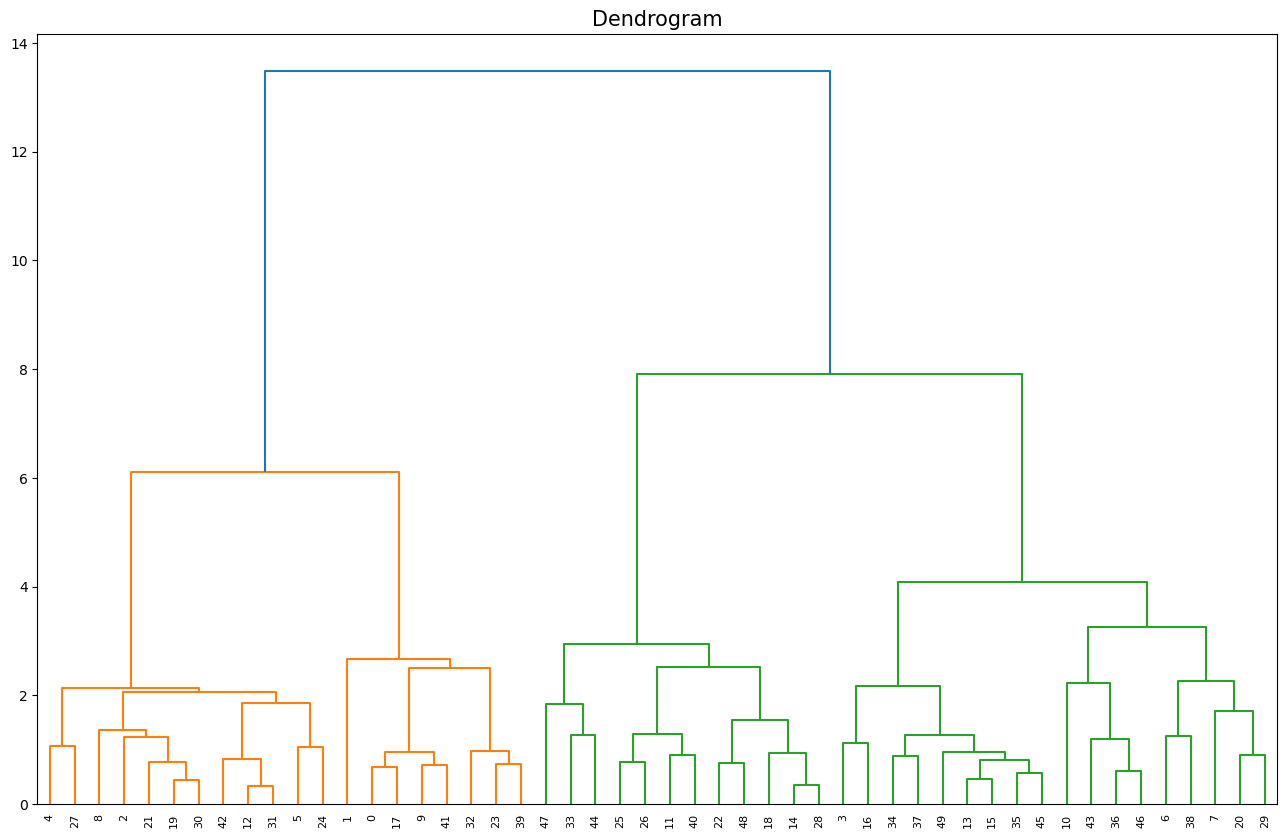

In [100]:
fig = plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(data1_transformed,method='ward'))
plt.title('Dendrogram',size=15)


In [101]:
dc1 = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')

In [102]:
# Fitting data on model
dc1_fit = dc1.fit_predict(data1_transformed)
Clusters1 = pd.DataFrame(dc1_fit,columns=['Clusters'])

In [108]:
data['cluster'] = dc1_fit

numeric_columns = data.select_dtypes(include=['number'])

cluster_means = numeric_columns.groupby('cluster').mean().reset_index()
data.head()

,Country,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,4
4,California,9.0,276,91,40.6,3


In [109]:
for i in range(5):
 print('cluster',i)
 print('Total Members in hierarchy:',len(list(data[data['cluster']==i]['Country'].values)))
 print()

cluster 0
Total Members in hierarchy: 9

cluster 1
Total Members in hierarchy: 8

cluster 2
Total Members in hierarchy: 12

cluster 3
Total Members in hierarchy: 12

cluster 4
Total Members in hierarchy: 9



### Using complete linkage

Text(0.5, 1.0, 'Dendrogram')

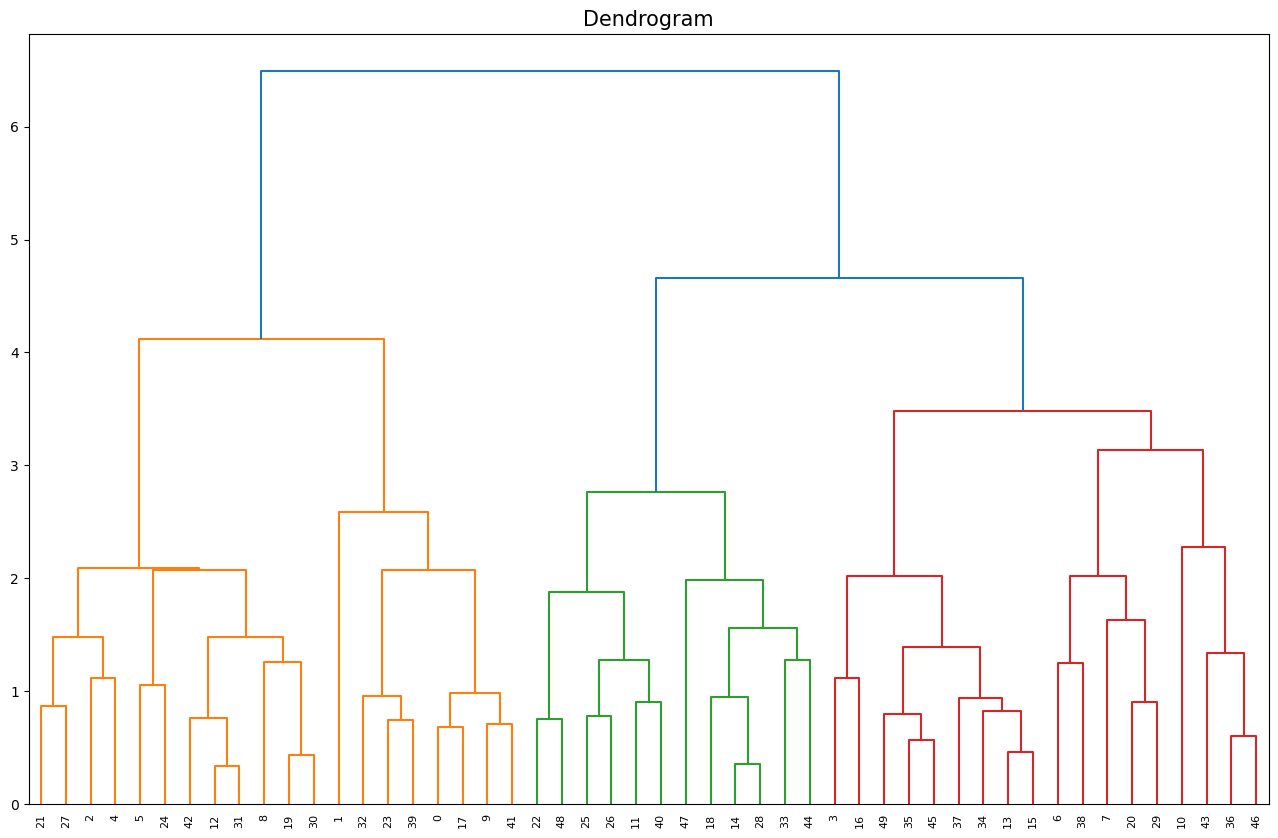

In [110]:
fig = plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(data1_transformed,method='complete'))
plt.title('Dendrogram',size=15)


In [111]:
dc2 = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')

In [113]:
# Fitting data on model
dc2_fit = dc2.fit_predict(data1_transformed)
Clusters2 = pd.DataFrame(dc2_fit,columns=['Clusters'])

In [114]:
data['cluster'] = dc2_fit

numeric_columns = data.select_dtypes(include=['number'])

cluster_means = numeric_columns.groupby('cluster').mean().reset_index()
data.head()

,Country,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,4
4,California,9.0,276,91,40.6,3


In [115]:
for i in range(5):
 print('cluster',i)
 print('Total Members in hierarchy:',len(list(data[data['cluster']==i]['Country'].values)))
 print()

cluster 0
Total Members in hierarchy: 9

cluster 1
Total Members in hierarchy: 8

cluster 2
Total Members in hierarchy: 12

cluster 3
Total Members in hierarchy: 12

cluster 4
Total Members in hierarchy: 9



## Elbow Plot

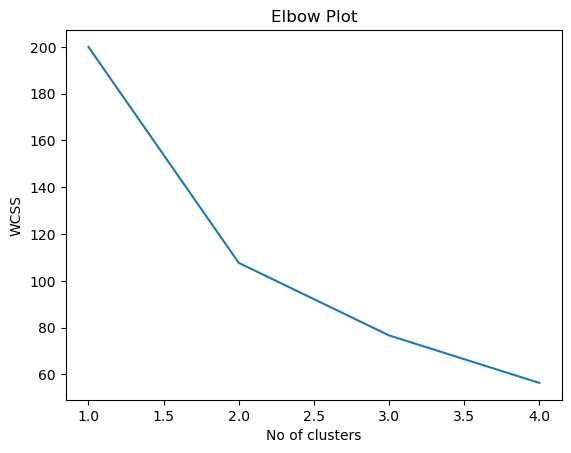

In [138]:
wcss = []
for i in range(1,5):
 kmeans = KMeans(n_clusters=i,random_state=0)
 kmeans.fit(data1_transformed)
 wcss.append(kmeans.inertia_)
plt.plot(range(1,5),wcss)
plt.title('Elbow Plot')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

## Kmeans

In [146]:
new_clusters = KMeans(n_clusters=5, random_state=42)

# Fit KMeans to the transformed DataFrame
new_clusters.fit(data1_transformed)
KM_labels = new_clusters.labels_

In [148]:
data['cluster'] = new_clusters.labels_
new_clusters.cluster_centers_

array([[-0.72022398, -0.49175571,  1.28609276, -0.51801769],
       [-0.19347093, -0.31715294, -0.04944974, -0.06958072],
       [ 0.7623321 ,  1.01239549,  0.90058428,  1.13313467],
       [-1.32911053, -1.32029361, -1.00077956, -1.29242127],
       [ 1.219954  ,  0.9030792 , -0.87476952,  0.37102801]])

In [150]:
for i in range(5):
    print('Cluster', i)
    print('Total Members in cluster:', len(data[data['cluster'] == i]))
    print()

Cluster 0
Total Members in cluster: 6

Cluster 1
Total Members in cluster: 13

Cluster 2
Total Members in cluster: 12

Cluster 3
Total Members in cluster: 10

Cluster 4
Total Members in cluster: 9

